In [288]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Video games sales dataset

In [297]:
# load dataset
games = pd.read_csv("../datasets/video_games_sales.csv")
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Movie sales dataset

In [332]:
# load dataset
games = pd.read_csv("../datasets/video_games_sales.csv")
# process dataset
games = games.dropna()
games = games[["Rank", "Name", "Year", "Global_Sales"]]
games.columns = ["Rank", "Game", "Game Year", "Game Sales"] # rename columns
games["Rank"] = games["Rank"].astype(int)
games["Game Year"] = games["Game Year"].astype(int)
games = games[games["Game Sales"] >= 1].reset_index(drop=True)
games = games[games["Game Year"] >= 1990].reset_index(drop=True)
games = games[games["Game Year"] <= 2015].reset_index(drop=True)
games["Rank"] = games.index+1
games = games[:100] # match lenght with movies dataset
# display dataset
games

,Rank,Game,Game Year,Game Sales
0,1,Wii Sports,2006,82.74
1,2,Mario Kart Wii,2008,35.82
2,3,Wii Sports Resort,2009,33.00
3,4,Pokemon Red/Pokemon Blue,1996,31.37
4,5,New Super Mario Bros.,2006,30.01
...,...,...,...,...
95,96,Just Dance,2009,7.27
96,97,Battlefield 3,2011,7.23
97,98,Need for Speed Underground,2003,7.20
98,99,Tekken 3,1998,7.16


In [299]:
# laod dataset
movies = pd.read_csv("../datasets/action_movie_box_office.csv")
movies

,Rank,Released,Movies,worldwide box office $,domestic box office $,international box office $
0,1,2009,Avatar,2923706026,785221649,2138484377
1,2,2019,Avengers: Endgame,2794731755,858373000,1936358755
2,3,2022,Avatar: The Way of Water,2318552513,683875614,1634676899
3,4,2018,Avengers: Infinity War,2048359754,678815482,1369544272
4,5,2021,Spider-Man: No Way Home,1910048245,814115070,1095933175
...,...,...,...,...,...,...
1995,"1,996",2021,Vanquish,62673,0,62673
1996,"1,997",2011,Gekijouban Trigun: Badlands Rumble,62027,62027,0
1997,"1,998",2018,Tian Xia Di Yi Biao Ju,62007,0,62007
1998,"1,999",2014,Tiger & Bunny the Movie: The Rising,61562,61562,0


In [333]:
# laod dataset
movies = pd.read_csv("../datasets/action_movie_box_office.csv")
# process dataset
movies = movies[["Rank", "Movies", "Released", "international box office $"]]
movies.columns = ["Rank", "Movie", "Movie Year", "Movie Sales"]
movies = movies[movies["Movie Year"] >= 1990].reset_index(drop=True)
movies = movies[movies["Movie Year"] <= 2015].reset_index(drop=True)
movies["Movie Sales"] = ((movies["Movie Sales"] * 0.000001) / 15).round(2) # revenue in $ / 15$ (assumed ticket price) and interpeted as million $
movies["Rank"] = movies["Rank"].str.replace(",","").astype(int)
movies["Rank"] = movies.index + 1
movies["Movie Year"] = movies["Movie Year"].astype(np.int32)
movies = movies[:100]
# display dataset
movies

,Rank,Movie,Movie Year,Movie Sales
0,1,Avatar,2009,142.57
1,2,Jurassic World,2015,67.84
2,3,The Avengers,2012,59.45
3,4,Furious 7,2015,77.44
4,5,Avengers: Age of Ultron,2015,62.42
...,...,...,...,...
95,96,The Expendables 2,2012,15.13
96,97,Maze Runner: The Scorch Trials,2015,15.26
97,98,Ransom,1996,11.48
98,99,A Good Day to Die Hard,2013,15.79


# Merged dataset

In [359]:
games.dtypes

Rank            int64
Game           object
Game Year       int32
Game Sales    float64
dtype: object

In [360]:


movies.dtypes

Rank             int64
Movie           object
Movie Year       int32
Movie Sales    float64
dtype: object

In [366]:
data_merge = pd.merge(games, movies, on="Rank")

In [367]:
data_merge

,Rank,Game,Game Year,Game Sales,Movie,Movie Year,Movie Sales
0,1,Wii Sports,2006,82.74,Avatar,2009,142.57
1,2,Mario Kart Wii,2008,35.82,Jurassic World,2015,67.84
2,3,Wii Sports Resort,2009,33.00,The Avengers,2012,59.45
3,4,Pokemon Red/Pokemon Blue,1996,31.37,Furious 7,2015,77.44
4,5,New Super Mario Bros.,2006,30.01,Avengers: Age of Ultron,2015,62.42
...,...,...,...,...,...,...,...
95,96,Just Dance,2009,7.27,The Expendables 2,2012,15.13
96,97,Battlefield 3,2011,7.23,Maze Runner: The Scorch Trials,2015,15.26
97,98,Need for Speed Underground,2003,7.20,Ransom,1996,11.48
98,99,Tekken 3,1998,7.16,A Good Day to Die Hard,2013,15.79


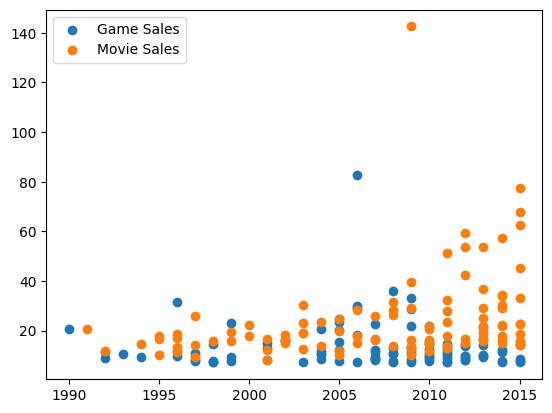

In [395]:
# simple plot
plt.scatter(data_merge["Game Year"], data_merge["Game Sales"], label="Game Sales")
plt.scatter(data_merge["Movie Year"], data_merge["Movie Sales"], label="Movie Sales")
plt.legend()

In [407]:
sales_melt = pd.melt(data_merge, id_vars=["Rank"], value_vars=["Game Sales", "Movie Sales"], var_name="Sales Type", value_name="Sales") 
year_melt = pd.melt(data_merge, id_vars=["Rank"], value_vars=["Game Year", "Movie Year"], var_name="Year Type", value_name="Year")

In [408]:
melt_merge = pd.merge(sales_melt, year_melt, on="Rank")

In [409]:
melt_merge

,Rank,Sale Type,Sales,Year Type,Year
0,1,Game Sales,82.74,Game Year,2006
1,1,Game Sales,82.74,Movie Year,2009
2,2,Game Sales,35.82,Game Year,2008
3,2,Game Sales,35.82,Movie Year,2015
4,3,Game Sales,33.00,Game Year,2009
...,...,...,...,...,...
395,98,Movie Sales,11.48,Movie Year,1996
396,99,Movie Sales,15.79,Game Year,1998
397,99,Movie Sales,15.79,Movie Year,2013
398,100,Movie Sales,10.15,Game Year,1998


In [410]:
sns.kdeplot(data=melt_merge, x="Sales", hue="Sales Type", multiple="stack")
plt.xlabel("$ milions in sales");

ValueError: Could not interpret value `Type` for `hue`. An entry with this name does not appear in `data`.

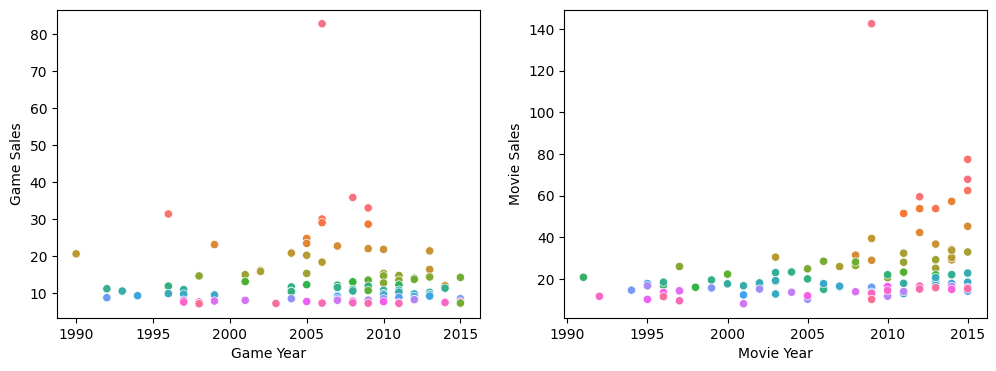

In [399]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.scatterplot(data=data_merge, x="Game Year", y="Game Sales", hue="Game", ax=axs[0], legend = False)
sns.scatterplot(data=data_merge, x="Movie Year", y="Movie Sales", hue="Movie", ax=axs[1], legend=False);

ValueError: Could not interpret value `Year` for `hue`. An entry with this name does not appear in `data`.

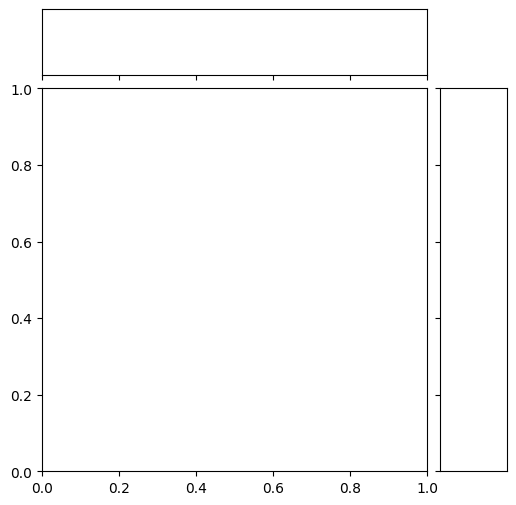

In [251]:
sns.jointplot(data=merged, x="Game Sales", y="Movie Sales", hue="Year")